In [118]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [120]:
df=pd.read_csv("League of Legends Champion Stats 12.12.csv")

In [121]:
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,68.69,-0.68,48.87%,92.15%,7.49%,5.55%,1.95
1,Ahri,Mage,MID,God,73.09,-0.63,50.42%,94.37%,10.14%,7.85%,2.65
2,Akali,Assassin,MID,S,60.41,1.74,49.24%,69.81%,6.74%,11.72%,2.42
3,Akali,Assassin,TOP,C,40.98,-2.85,46.38%,29.18%,2.78%,11.72%,2.05
4,Akshan,Marksman,MID,A,49.07,2.17,50.64%,57.12%,2.85%,7.17%,2.24


In [122]:
df['Win %'] = df['Win %'].str.rstrip('%').astype('float') / 100.0

In [123]:
df.loc[:,['Name','Win %','KDA']].to_csv('LoL_Kmeans.csv')

In [125]:
df=pd.read_csv("LoL_Kmeans.csv")

In [126]:
df.head()

,Unnamed: 0,Name,Win %,KDA
0,0,Aatrox,0.4887,1.95
1,1,Ahri,0.5042,2.65
2,2,Akali,0.4924,2.42
3,3,Akali,0.4638,2.05
4,4,Akshan,0.5064,2.24


In [127]:
df=df.drop('Unnamed: 0', axis=1)

In [128]:
df.head()

,Name,Win %,KDA
0,Aatrox,0.4887,1.95
1,Ahri,0.5042,2.65
2,Akali,0.4924,2.42
3,Akali,0.4638,2.05
4,Akshan,0.5064,2.24


Text(0, 0.5, 'Win Rate')

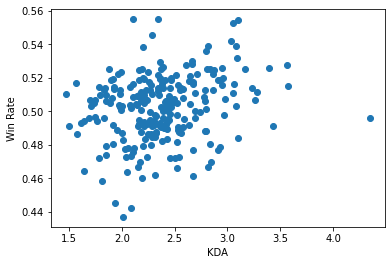

In [129]:
plt.scatter(df.KDA,df['Win %'])
plt.xlabel('KDA')
plt.ylabel('Win Rate')

In [130]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['KDA','Win %']])
y_predicted

D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 0, 1, 3, 1, 3, 1, 0, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 3,
       3, 0, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 1,
       0, 1, 3, 1, 3, 3, 0, 1, 1, 1, 3, 1, 0, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 3, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       1, 2, 3, 1, 1, 3, 1, 0, 0, 0, 3, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 1,
       3, 0, 0, 1, 1, 0, 1, 3, 1, 3, 3, 0, 0, 3, 3, 3, 1, 2, 1, 0, 0, 0,
       0, 3, 0, 1, 0, 0, 3, 1, 3, 3, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 0, 3, 3, 1, 1, 0, 3, 1, 1, 3, 3,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 1, 1, 2, 0, 1, 3, 3,
       3, 3, 3, 3, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1])

In [131]:
df['cluster']=y_predicted
df.head()

,Name,Win %,KDA,cluster
0,Aatrox,0.4887,1.95,3
1,Ahri,0.5042,2.65,0
2,Akali,0.4924,2.42,1
3,Akali,0.4638,2.05,3
4,Akshan,0.5064,2.24,1


In [132]:
km.cluster_centers_

array([[2.81962963, 0.50963148],
       [2.32889831, 0.50104068],
       [3.47111111, 0.51232222],
       [1.87053571, 0.49515179]])

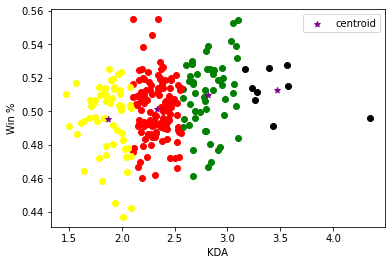

In [135]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.KDA,df1['Win %'],color='green')
plt.scatter(df2.KDA,df2['Win %'],color='red')
plt.scatter(df3.KDA,df3['Win %'],color='black')
plt.scatter(df4.KDA,df4['Win %'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('KDA')
plt.ylabel('Win %')
plt.legend()